In [1]:
import os
os.curdir
os.chdir('/Users/manojravikumar/Public/60162417/05-tutorials/14-aiml/machine-learning-practice/supervised')

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
df = pd.read_csv('Travel.csv')
df1 = df.copy()

In [4]:
df1.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### Handling null values

In [5]:
df1.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
print(df["Gender"].value_counts().to_dict())
df1["Gender"]=df1["Gender"].replace("Fe Male","Female")
print(df1["Gender"].value_counts().to_dict())

{'Male': 2916, 'Female': 1817, 'Fe Male': 155}
{'Male': 2916, 'Female': 1972}


In [7]:
print(df["MaritalStatus"].value_counts().to_dict())
df1["MaritalStatus"]=df1["MaritalStatus"].replace("Unmarried","Single")
print(df1["MaritalStatus"].value_counts().to_dict())

{'Married': 2340, 'Divorced': 950, 'Single': 916, 'Unmarried': 682}
{'Married': 2340, 'Single': 1598, 'Divorced': 950}


In [8]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df1[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [9]:
df1[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [10]:
#PreferredPropertyStar
df1.PreferredPropertyStar.fillna(df1.PreferredPropertyStar.mode()[0], inplace=True)

#TypeofContract
df1.TypeofContact.fillna(df1.TypeofContact.mode()[0], inplace=True)

#NumberOfChildrenVisiting
df1.NumberOfChildrenVisiting.fillna(df1.NumberOfChildrenVisiting.mode()[0], inplace=True)



#Age
df1.Age.fillna(df1.Age.median(), inplace=True)

#DurationOfPitch
df1.DurationOfPitch.fillna(df1.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df1.NumberOfFollowups.fillna(df1.NumberOfFollowups.mode()[0], inplace=True)

#NumberOfTrips
df1.NumberOfTrips.fillna(df1.NumberOfTrips.median(), inplace=True)

#MonthlyIncome
df1.MonthlyIncome.fillna(df1.MonthlyIncome.median(), inplace=True)

In [11]:
df1.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [12]:
df1.drop('CustomerID', inplace=True, axis=1)

In [13]:
df1['TotalVisiting'] = df1['NumberOfPersonVisiting'] + df1['NumberOfChildrenVisiting']
df1.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [14]:
num_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features), "; Columns : ", ",".join(num_features))

Num of Numerical Features : 12 ; Columns :  ProdTaken,Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome,TotalVisiting


In [15]:
cat_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features), "; Columns : ", ",".join(cat_features))

Num of Categorical Features : 6 ; Columns :  TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation


In [16]:
discrete_features=[feature for feature in num_features if len(df1[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features), "; Columns : ", ",".join(discrete_features))

Num of Discrete Features : 9 ; Columns :  ProdTaken,CityTier,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,TotalVisiting


In [17]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features), "; Columns : ", ",".join(continuous_features))

Num of Continuous Features : 3 ; Columns :  Age,DurationOfPitch,MonthlyIncome


In [18]:
from sklearn.model_selection import train_test_split
y1 = df1['ProdTaken']
X1 = df1.drop(['ProdTaken'], axis=1)

In [19]:
X1.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)
X1_train.shape, X1_test.shape

((3910, 17), (978, 17))

In [21]:
cat_features = X1.select_dtypes(include="object").columns
print(" Category Features are :: ",",".join(cat_features))
num_features = X1.select_dtypes(exclude="object").columns
print(" Number Features are :: ",",".join(num_features))

 Category Features are ::  TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
 Number Features are ::  Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome,TotalVisiting


In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [23]:
X1_train=preprocessor.fit_transform(X1_train)
X1_test=preprocessor.transform(X1_test)

In [24]:
X1_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]], shape=(3910, 26))

### RANDOM FOREST CLASSIFICATION

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(criterion='gini',max_depth=4, max_features= 'log2', max_leaf_nodes=3),
    "Random Forest":RandomForestClassifier(),
    "k Neighbour":KNeighborsClassifier(n_neighbors=10, p=2, algorithm="ball_tree")
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X1_train, y1_train) # Train model

    # Make predictions
    y1_train_pred = model.predict(X1_train)
    y1_test_pred = model.predict(X1_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y1_train, y1_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y1_train, y1_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y1_train, y1_train_pred) # Calculate Precision
    model_train_recall = recall_score(y1_train, y1_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y1_train, y1_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y1_test, y1_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y1_test, y1_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y1_test, y1_test_pred) # Calculate Precision
    model_test_recall = recall_score(y1_test, y1_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y1_test, y1_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8460
- F1 score: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- Roc Auc Score: 0.6368
----------------------------------
Model performance for Test set
- Accuracy: 0.8364
- F1 score: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- Roc Auc Score: 0.6307


Decision Tree
Model performance for Training set
- Accuracy: 0.8136
- F1 score: 0.7299
- Precision: 0.0000
- Recall: 0.0000
- Roc Auc Score: 0.5000
----------------------------------
Model performance for Test set
- Accuracy: 0.8047
- F1 score: 0.7176
- Precision: 0.0000
- Recall: 0.0000
- Roc Auc Score: 0.5000


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9243
- F1 score: 0.9180
- Precision: 0.9680
- Recall: 0.6335
- Roc Auc Score: 0.8142


k Neighbour
Model performance for Training set
-

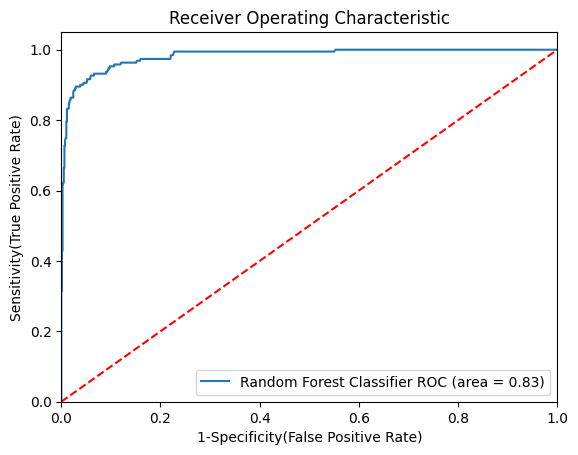

In [26]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X1_train, y1_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y1_test, model.predict_proba(X1_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

### RANDOM FOREST REGRESSOR

In [27]:
df2 = pd.read_csv('cardekho_imputated.csv')
# df2 = df2.assign(Age = lambda x: 2025 - x["Year"])
# df2 = df2[ 
#   (df2["Year"] > 2010) 
#    & (df2["Make"].isin(["BMW","Honda"])) 
#     & (df2["Seating Capacity"] == 5)
# ]

In [28]:
features_with_na=[features for features in df2.columns if df2[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df2[feature].isnull().mean()*100,5), '% missing values')

In [29]:
df2.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [30]:
df2.drop('car_name', axis=1, inplace=True, errors='ignore')
df2.drop('brand', axis=1, inplace=True, errors='ignore')
column_to_drop_name = df2.columns[0]
if str(column_to_drop_name).startswith("Unnamed"):
    df2.drop(column_to_drop_name, axis=1, inplace=True, errors='ignore')

In [31]:
df2.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [32]:
y2 = df2['selling_price']
X2 = df2.drop(['selling_price'], axis=1)


num_features = [feature for feature in df2.columns if df2[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features), "; Columns : ", ",".join(num_features))

cat_features = [feature for feature in df2.columns if df2[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features), "; Columns : ", ",".join(cat_features))

discrete_features=[feature for feature in num_features if len(df2[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features), "; Columns : ", ",".join(discrete_features))

continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features), "; Columns : ", ",".join(continuous_features))


from sklearn.preprocessing import LabelEncoder
model_encoder=LabelEncoder()
X2['model']=model_encoder.fit_transform(X2['model'])


from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer2 = StandardScaler()
num_features2 = X2.select_dtypes(exclude="object").columns
oh_transformer2 = OneHotEncoder(drop='first')
onehot_columns2 = ['seller_type','fuel_type','transmission_type']

preprocessor2 = ColumnTransformer(
    [
        # ("ModelEncoder", model_encoder, label_columns2),
        ("OneHotEncoder", oh_transformer2, onehot_columns2),
        ("StandardScaler", numeric_transformer2, num_features2)
    ],remainder='passthrough'
)

Num of Numerical Features : 7 ; Columns :  vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
Num of Categorical Features : 4 ; Columns :  model,seller_type,fuel_type,transmission_type
Num of Discrete Features : 2 ; Columns :  vehicle_age,seats
Num of Continuous Features : 5 ; Columns :  km_driven,mileage,engine,max_power,selling_price


In [33]:
preprocessor2

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [34]:


X2=preprocessor2.fit_transform(X2)


print(X2)
print(y2)

[[ 1.          0.          0.         ... -1.32425883 -1.26335238
  -0.40302241]
 [ 1.          0.          0.         ... -0.55471774 -0.43257082
  -0.40302241]
 [ 1.          0.          0.         ... -0.55471774 -0.47911321
  -0.40302241]
 ...
 [ 0.          0.          1.         ...  0.02291783  0.06822523
  -0.40302241]
 [ 0.          0.          1.         ...  1.32979434  0.91715831
   2.07344426]
 [ 0.          0.          0.         ...  0.02099878  0.39588361
  -0.40302241]]
0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64


In [35]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)
X2_train.shape, X2_test.shape

((12328, 14), (3083, 14))

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X2_train, y2_train) # Train model

    # Make predictions
    y2_train_pred = model.predict(X2_train)
    y2_test_pred = model.predict(X2_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y2_train, y2_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y2_test, y2_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 553855.6665
- Mean Absolute Error: 268101.6071
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502543.5930
- Mean Absolute Error: 279618.5794
- R2 Score: 0.6645


Lasso
Model performance for Training set
- Root Mean Squared Error: 553855.6710
- Mean Absolute Error: 268099.2226
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502542.6696
- Mean Absolute Error: 279614.7461
- R2 Score: 0.6645


Ridge
Model performance for Training set
- Root Mean Squared Error: 553856.3160
- Mean Absolute Error: 268059.8015
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502533.8230
- Mean Absolute Error: 279557.2169
- R2 Score: 0.6645


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 325880.8558
- Mean 

In [37]:
X2

array([[ 1.        ,  0.        ,  0.        , ..., -1.32425883,
        -1.26335238, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.55471774,
        -0.43257082, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.55471774,
        -0.47911321, -0.40302241],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.02291783,
         0.06822523, -0.40302241],
       [ 0.        ,  0.        ,  1.        , ...,  1.32979434,
         0.91715831,  2.07344426],
       [ 0.        ,  0.        ,  0.        , ...,  0.02099878,
         0.39588361, -0.40302241]], shape=(15411, 14))

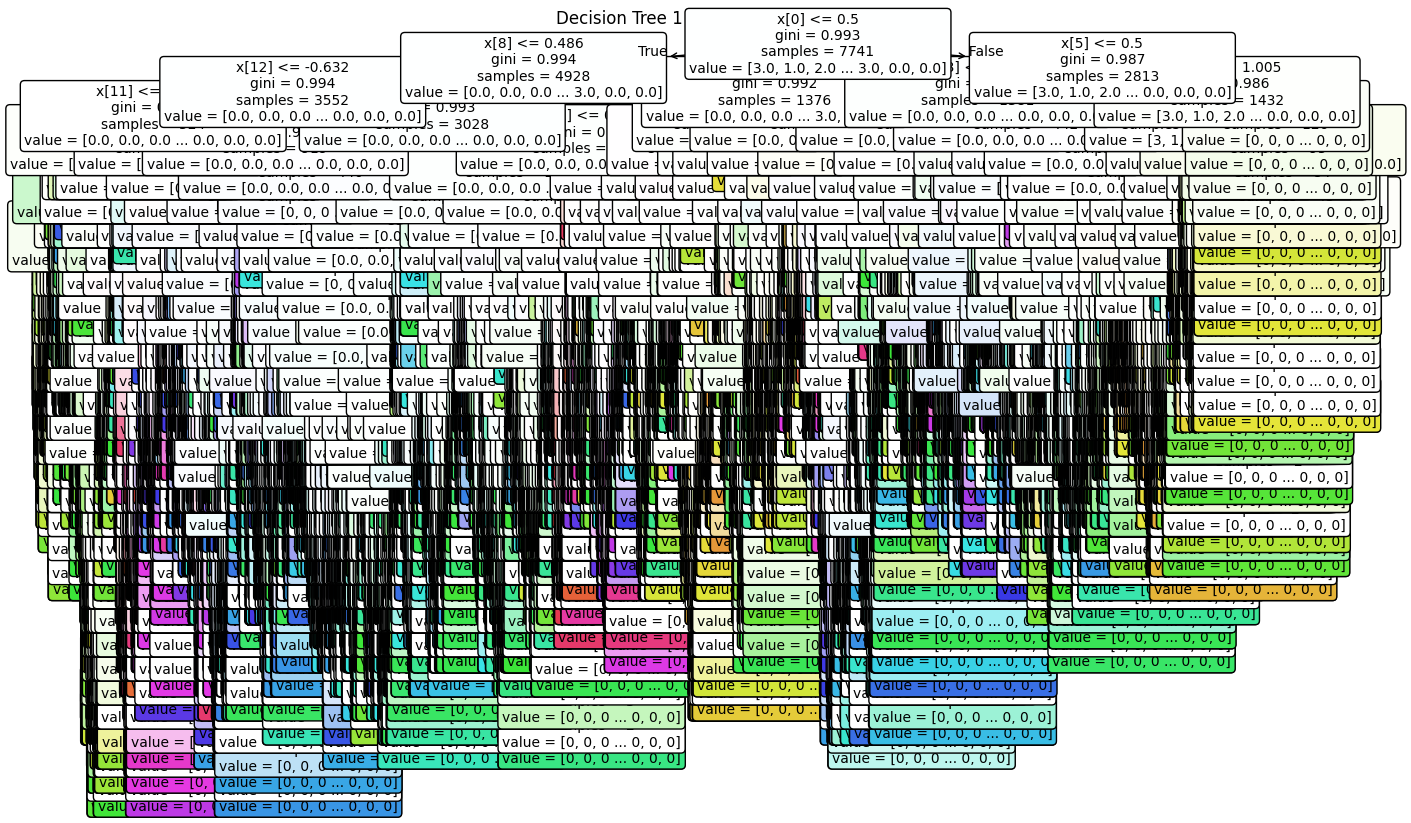

[Text(0.42195912013924997, 0.9848484848484849, 'x[12] <= -0.62\ngini = 0.993\nsamples = 7809\nvalue = [0.0, 1.0, 4.0 ... 0.0, 0.0, 0.0]'),
 Text(0.04154036618865768, 0.9545454545454546, 'x[12] <= -1.255\ngini = 0.986\nsamples = 1700\nvalue = [0.0, 1.0, 4.0 ... 0.0, 0.0, 0.0]'),
 Text(0.23174974316395383, 0.9696969696969697, 'True  '),
 Text(0.008658950531411719, 0.9242424242424242, 'x[8] <= 2.477\ngini = 0.964\nsamples = 108\nvalue = [0.0, 1.0, 0.0 ... 0.0, 0.0, 0.0]'),
 Text(0.006224472761671582, 0.8939393939393939, 'x[9] <= 0.569\ngini = 0.957\nsamples = 78\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.003171776751432864, 0.8636363636363636, 'x[9] <= -0.495\ngini = 0.955\nsamples = 70\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.0008725168326748651, 0.8333333333333334, 'x[12] <= -1.333\ngini = 0.858\nsamples = 17\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.0004273551833509543, 0.803030303030303, 'x[8] <= -0.178\ngini = 0.64\nsamples = 3\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.00028490345556

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import plot_tree
# randomforestmodel=RandomForestClassifier()
# randomforestmodel.fit(X2_train, y2_train)

# plt.figure(figsize=(15, 10))
# plot_tree(randomforestmodel.estimators_[0], 
#           filled=True, rounded=True,
#           fontsize=10)
# plt.title("Decision Tree 1 from Random Forest")
# plt.show()

# # Plot the second tree
# plt.figure(figsize=(15, 10))
# plot_tree(randomforestmodel.estimators_[1],
#           filled=True, rounded=True,
#           fontsize=10)